###**Hands-On With Feature Engineering**

**Imputation**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
# Example Dataset
data = {'Age': [25, None, 35, 29], 'Salary': [50000, 54000, None, 58000]}
df = pd.DataFrame(data)
# Numerical Imputation with Mean
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
# Categorical Imputation (replace NaN with 'Unknown')
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
print(df)

         Age   Salary
0  25.000000  50000.0
1  29.666667  54000.0
2  35.000000  54000.0
3  29.000000  58000.0


**Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Example Dataset
data = {'City': ['London', 'Paris', 'Berlin']}
df = pd.DataFrame(data)
# One-Hot Encoding
one_hot = pd.get_dummies(df['City'])
# Label Encoding
le = LabelEncoder()
df['City_Label'] = le.fit_transform(df['City'])
print(one_hot)
print(df)


   Berlin  London  Paris
0   False    True  False
1   False   False   True
2    True   False  False
     City  City_Label
0  London           1
1   Paris           2
2  Berlin           0


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Example Dataset
data = {'Age': [25, 35, 29], 'Salary': [50000, 54000, 58000]}
df = pd.DataFrame(data)
# Standardization
scaler = StandardScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])
# Normalization
normalizer = MinMaxScaler()
df[['Age', 'Salary']] = normalizer.fit_transform(df[['Age', 'Salary']])
print(df)

   Age  Salary
0  0.0     0.0
1  1.0     0.5
2  0.4     1.0


**Creating Interaction Features**

In [ ]:
# Example Dataset
data = {'Bedrooms': [3, 4, 2], 'House_Size': [1000, 1200, 800]}
df = pd.DataFrame(data)
# Interaction Feature
df['Rooms_per_Square_Meter'] = df['Bedrooms'] / df['House_Size']
print(df)


   Bedrooms  House_Size  Rooms_per_Square_Meter
0         3        1000                0.003000
1         4        1200                0.003333
2         2         800                0.002500


**Log Transformation**

In [ ]:
import numpy as np
# Example Dataset
data = {'Income': [1000, 10000, 50000, 100000]}
df = pd.DataFrame(data)
# Log Transformation
df['Log_Income'] = np.log1p(df['Income'])
print(df)


   Income  Log_Income
0    1000    6.908755
1   10000    9.210440
2   50000   10.819798
3  100000   11.512935


**Polynomial Features**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Example Dataset
data = {'Feature': [2, 3, 4]}
df = pd.DataFrame(data)
# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features = poly.fit_transform(df[['Feature']])
print(polynomial_features)


[[ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]]


**Binning**

In [ ]:
# Example Dataset
data = {'Age': [25, 35, 29, 50, 60]}
df = pd.DataFrame(data)
# Binning
bins = [0, 30, 50, 100]
labels = ['Young', 'Middle-Aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
print(df)


   Age    Age_Group
0   25        Young
1   35  Middle-Aged
2   29        Young
3   50  Middle-Aged
4   60       Senior


#**Hands-On With Feature Selection**

**Correlation Analysis**

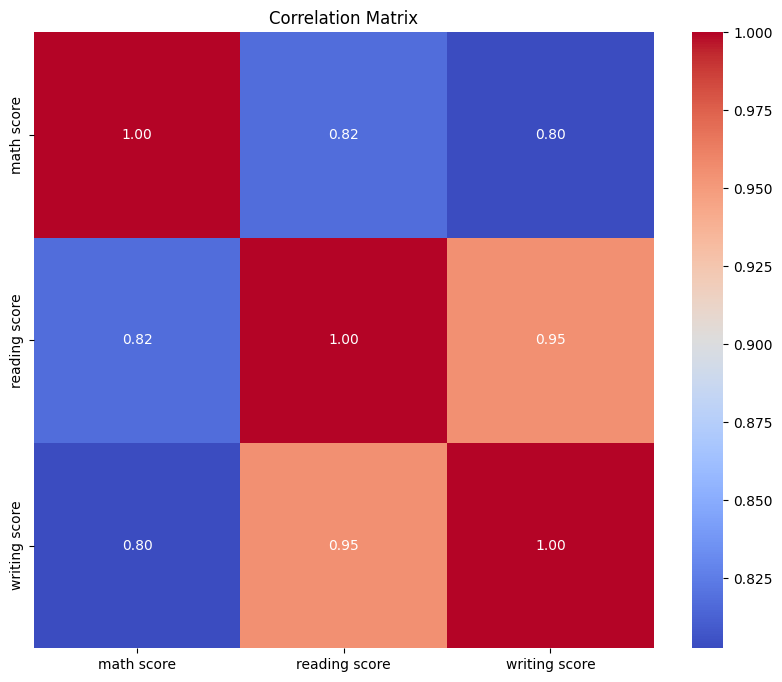

Highly correlated pairs (|correlation| > 0.85):
reading score - writing score: 0.95
writing score - reading score: 0.95


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load dataset
data = pd.read_csv("/content/students_performance.csv")
# Filter numeric columns
numeric_data = data.select_dtypes(include=["number"])
# Compute correlation matrix
correlation_matrix = numeric_data.corr()
# Visualize the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
# Drop features with high correlation (> 0.85)
threshold = 0.85
high_corr_pairs = [
 (col1, col2)
 for col1 in correlation_matrix.columns
 for col2 in correlation_matrix.columns
 if abs(correlation_matrix[col1][col2]) > threshold and col1 != col2
]
# Output the highly correlated pairs
print("Highly correlated pairs (|correlation| > 0.85):")
for col1, col2 in high_corr_pairs:
 print(f"{col1} - {col2}: {correlation_matrix[col1][col2]:.2f}")


**Univariate Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
# Check column names
print("Dataset columns:", data.columns)
# Ensure 'passed_all' exists (modify this logic as per your requirement)
if "passed_all" not in data.columns:
 # Example logic: Passed all exams if scores are >= 50
 data["passed_all"] = (data["math score"] >= 50) & (data["reading score"] >= 50) & (data["writing score"] >= 50)
# Encode categorical columns using one-hot encoding
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
'test preparation course']
data_encoded = pd.get_dummies(data, columns=categorical_columns,
drop_first=True)
# Define features and target
X = data_encoded.drop(columns=["passed_all"])
y = data_encoded["passed_all"]
# Apply ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
# Display selected feature scores
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

Dataset columns: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
Selected Features: ['math score', 'reading score', 'writing score', 'lunch_standard', 'test preparation course_none']


**Recursive Feature Elimination (RFE)**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Initialize model
model = RandomForestClassifier()
# Apply RFE
rfe_selector = RFE(estimator=model, n_features_to_select=5, step=1)
X_rfe = rfe_selector.fit_transform(X, y)
# Get selected features
selected_rfe_features = X.columns[rfe_selector.support_]
print("RFE Selected Features:", list(selected_rfe_features))

RFE Selected Features: ['math score', 'reading score', 'writing score', 'gender_male', 'lunch_standard']


**Feature Importance from Tree-Based Models**

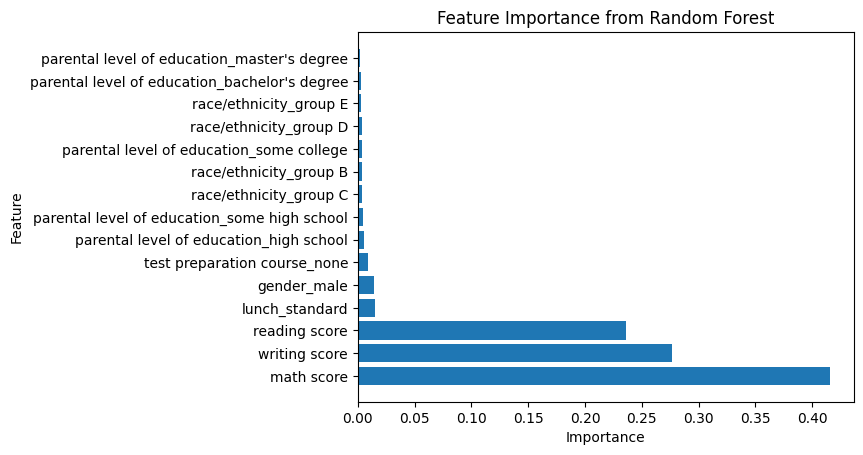

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# Train Random Forest model
model = RandomForestClassifier()
model.fit(X, y)
# Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.barh(X.columns[indices], importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.show()

**Regularization**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# Apply Lasso for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
# Select features with non-zero coefficients
lasso_selector = SelectFromModel(lasso, prefit=True)
X_lasso = lasso_selector.transform(X)
# Get selected features
selected_lasso_features = X.columns[lasso_selector.get_support()]
print("Lasso Selected Features:", list(selected_lasso_features))

Lasso Selected Features: ['math score', 'writing score']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


#**Visualizing Feature Importance**

**Bar Charts with Tree-Based Models**

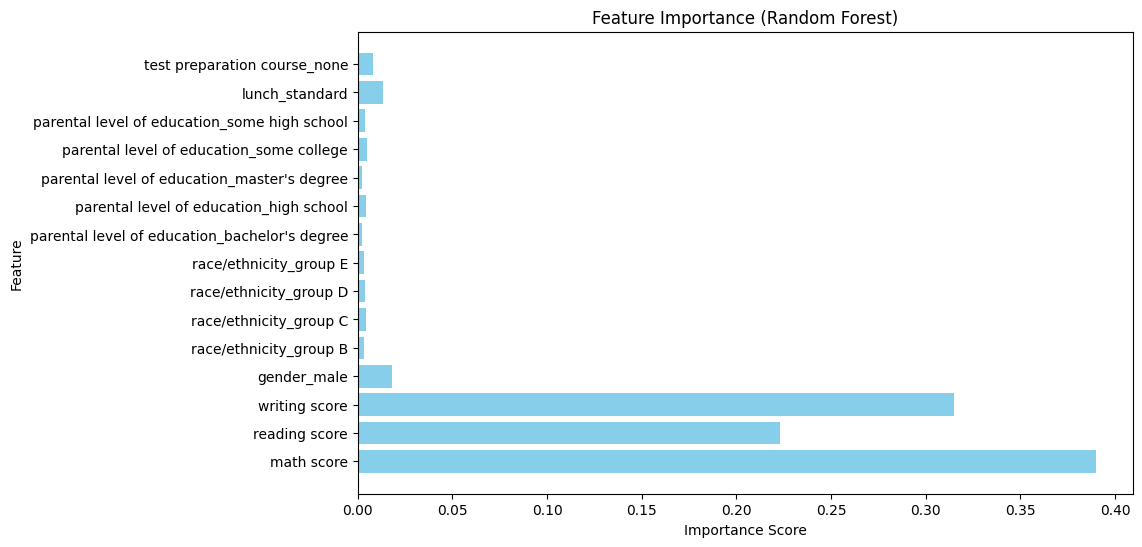

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest
model = RandomForestClassifier()
model.fit(X, y)
# Get feature importances
importances = model.feature_importances_
features = X.columns
# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()

**SHAP Summary Plot**

<Figure size 1000x600 with 0 Axes>

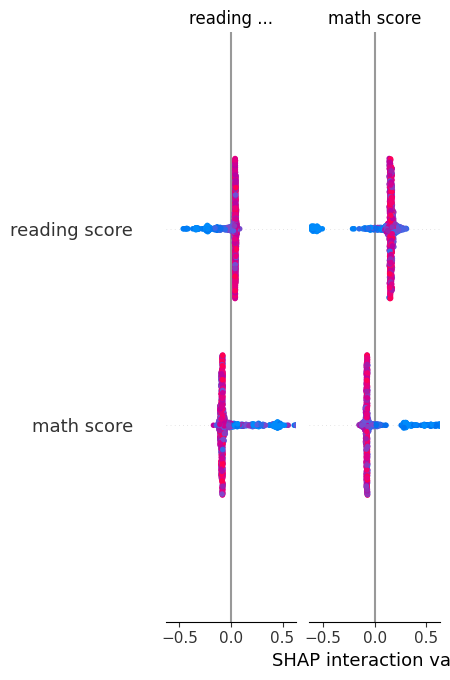

In [ ]:
import shap
import matplotlib.pyplot as plt

# Explain model predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Set the figure size to downscale the plot
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
shap.summary_plot(shap_values, X, show=False)
plt.show()


**Permutation Importance**

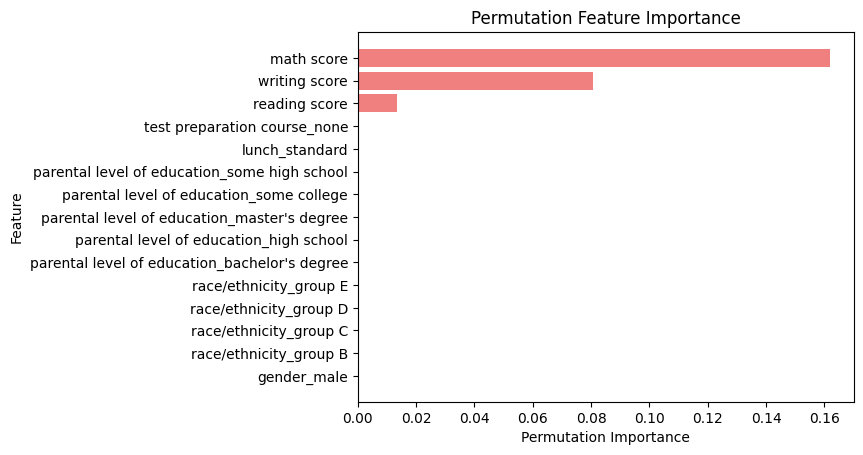

In [ ]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance
perm_importance = permutation_importance(model, X, y, scoring="accuracy")
# Plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx],
color="lightcoral")
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance")
plt.show()

#**Mini Challenge**

In [1]:
pip install --upgrade kagglehub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.5
    Uninstalling kagglehub-0.3.5:
      Successfully uninstalled kagglehub-0.3.5


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arunavakrchakraborty/australia-weather-data")

print("Path to dataset files:", path)

100%|██████████| 3.86M/3.86M [00:00<00:00, 4.19MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arunavakrchakraborty/australia-weather-data/versions/1


In [3]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/arunavakrchakraborty/australia-weather-data/versions/1"
print(os.listdir(dataset_path))


['Weather Training Data.csv', 'Weather Test Data.csv']


In [4]:
import pandas as pd

file_path = os.path.join(dataset_path, "Weather Training Data.csv")  # Replace with the actual file name
train_data = pd.read_csv(file_path)
print(train_data.head())  # Preview the first few rows

  row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   Row0   Albury     13.4     22.9       0.6          NaN       NaN   
1   Row1   Albury      7.4     25.1       0.0          NaN       NaN   
2   Row2   Albury     17.5     32.3       1.0          NaN       NaN   
3   Row3   Albury     14.6     29.7       0.2          NaN       NaN   
4   Row4   Albury      7.7     26.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2           W           41.0        ENE  ...        82.0         33.0   
3         WNW           56.0          W  ...        55.0         23.0   
4           W           35.0        SSE  ...        48.0         19.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN 

In [5]:
import pandas as pd

file_path = os.path.join(dataset_path, "Weather Test Data.csv")  # Replace with the actual file name
test_data = pd.read_csv(file_path)
print(test_data.head())  # Preview the first few rows

  row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   Row0   Albury     12.9     25.7       0.0          NaN       NaN   
1   Row1   Albury      9.2     28.0       0.0          NaN       NaN   
2   Row2   Albury     14.3     25.0       0.0          NaN       NaN   
3   Row3   Albury      9.7     31.9       0.0          NaN       NaN   
4   Row4   Albury     15.9     18.6      15.6          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0         WSW           46.0          W  ...         26.0         38.0   
1          NE           24.0         SE  ...          9.0         45.0   
2           W           50.0         SW  ...         24.0         49.0   
3         NNW           80.0         SE  ...         28.0         42.0   
4           W           61.0        NNW  ...         28.0         76.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         30.0       1007.6       1008.7       Na

**EDA**

In [6]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [7]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  object 
 1   Location       42677 non-null  object 
 2   MinTemp        42483 non-null  float64
 3   MaxTemp        42585 non-null  float64
 4   Rainfall       42250 non-null  float64
 5   Evaporation    24365 non-null  float64
 6   Sunshine       22178 non-null  float64
 7   WindGustDir    39868 non-null  object 
 8   WindGustSpeed  39887 non-null  float64
 9   WindDir9am     39670 non-null  object 
 10  WindDir3pm     41547 non-null  object 
 11  WindSpeed9am   42264 non-null  float64
 12  WindSpeed3pm   41882 non-null  float64
 13  Humidity9am    42136 non-null  float64
 14  Humidity3pm    41573 non-null  float64
 15  Pressure9am    38411 non-null  float64
 16  Pressure3pm    38432 non-null  float64
 17  Cloud9am       26592 non-null  float64
 18  Cloud3

Since the test data lacks the target column while the training data includes it, this is unequivocally a supervised learning problem, with the target variable present in the training dataset. Upon further investigation, I discovered that the absence of the target variable in the test data is due to the dataset being part of a competition, where the target variable is intentionally withheld.

To address this, I explored various approaches and found that I could either:
1. Split the training data into separate training and testing subsets for model evaluation, or
2. Train the model on the training data and use it on the test data while awaiting the release of the target variable for final evaluation.

Given that evaluation metrics are a requirement, I have decided to use the training data for both training and testing by splitting it into subsets. This will allow for proper model validation and performance assessment.

In [8]:
data = train_data

###**EDA**

**Data Inspection and loading**

In [9]:
# Import required libraries
import pandas as pd

# Load the data (if not already loaded)
# data = pd.read_csv("data.csv")  # Uncomment if loading from a file

# Basic overview
print("Data Overview:")
print(data.head())  # Display the first few rows
print("\nData Information:")
print(data.info())  # Summary of the dataset
print("\nMissing Values:")
print(data.isnull().sum())  # Count missing values
print("\nStatistical Summary:")
print(data.describe())  # Descriptive statistics for numerical columns


Data Overview:
  row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   Row0   Albury     13.4     22.9       0.6          NaN       NaN   
1   Row1   Albury      7.4     25.1       0.0          NaN       NaN   
2   Row2   Albury     17.5     32.3       1.0          NaN       NaN   
3   Row3   Albury     14.6     29.7       0.2          NaN       NaN   
4   Row4   Albury      7.7     26.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2           W           41.0        ENE  ...        82.0         33.0   
3         WNW           56.0          W  ...        55.0         23.0   
4           W           35.0        SSE  ...        48.0         19.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1      

**Visualize Missing Values**

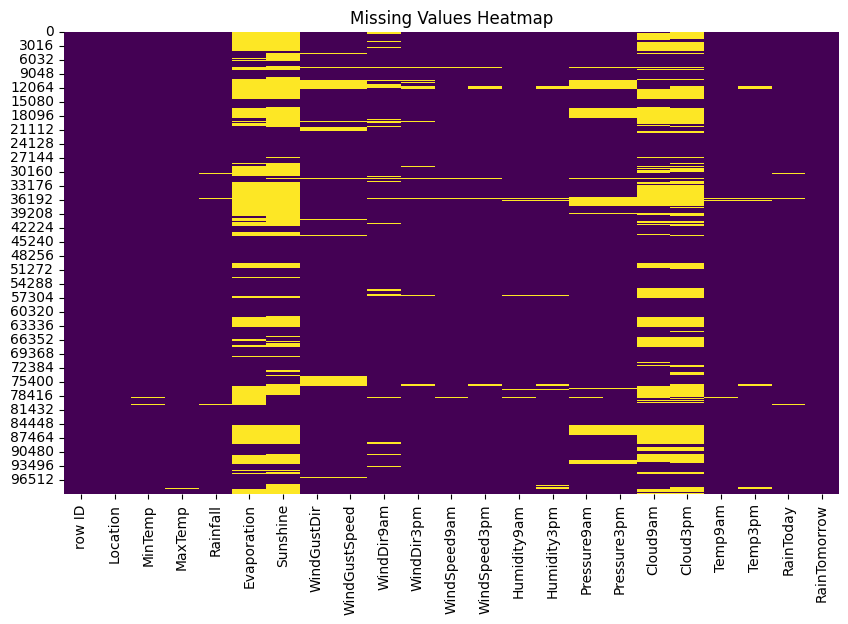

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


**Box plots**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline (if using Jupyter or Colab)
%matplotlib inline


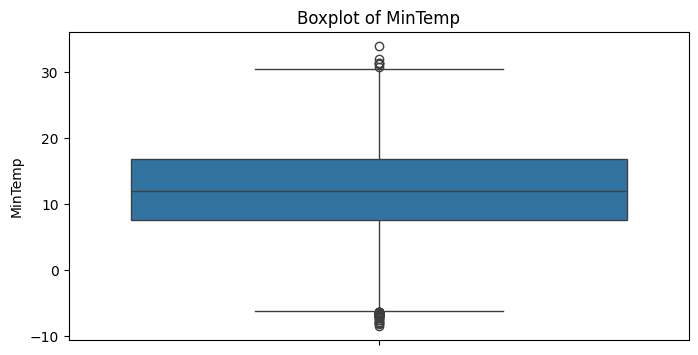

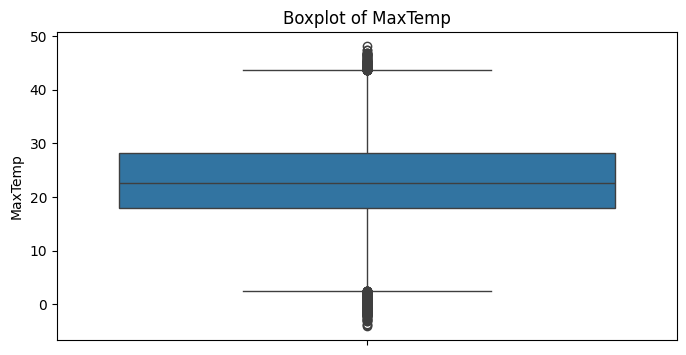

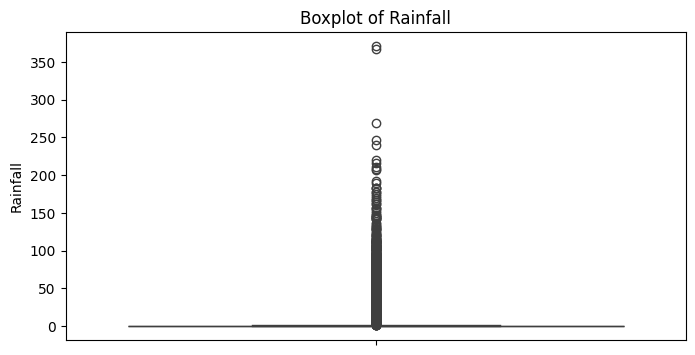

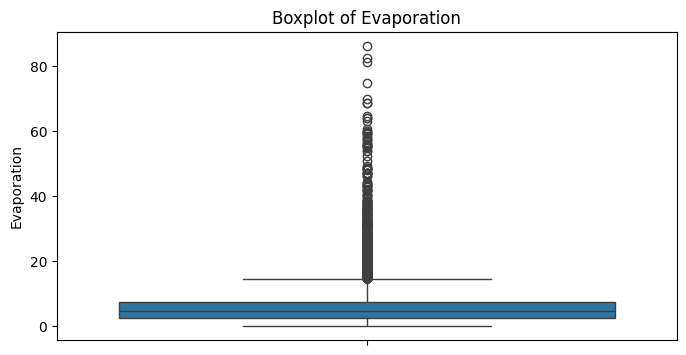

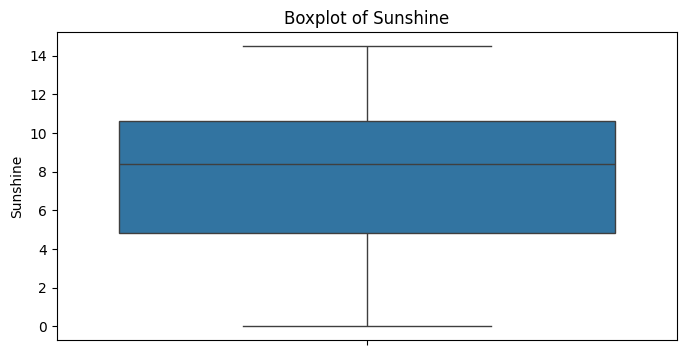

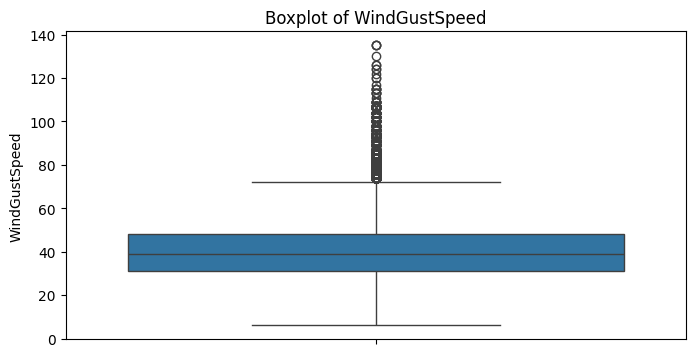

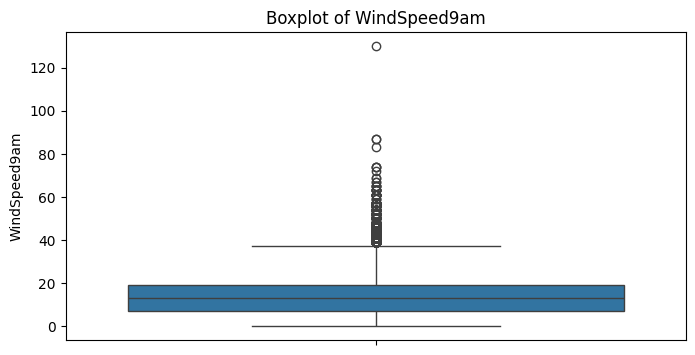

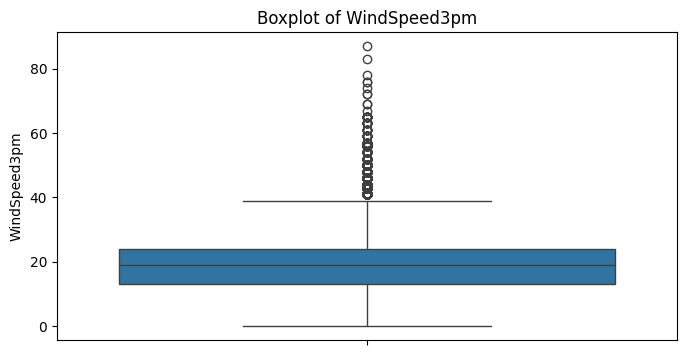

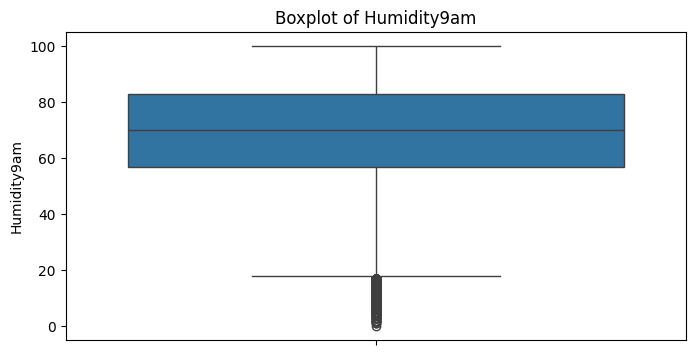

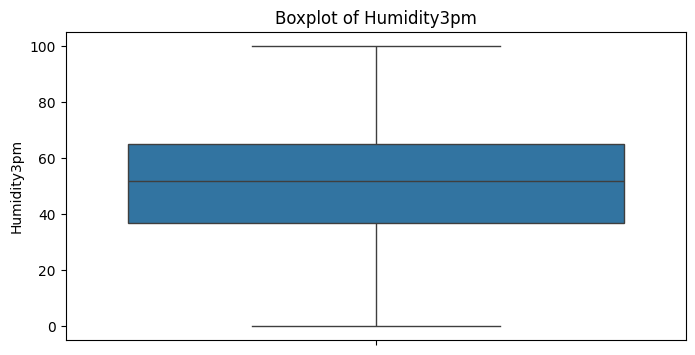

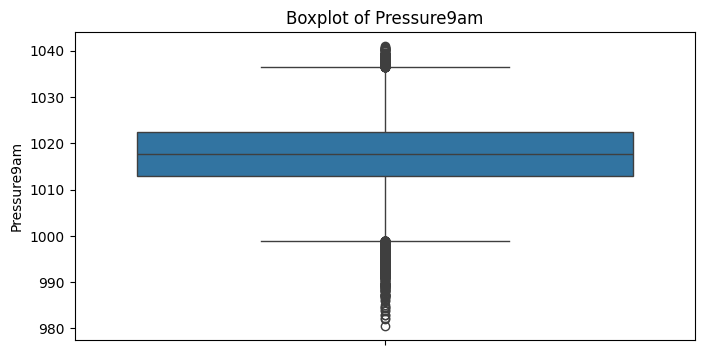

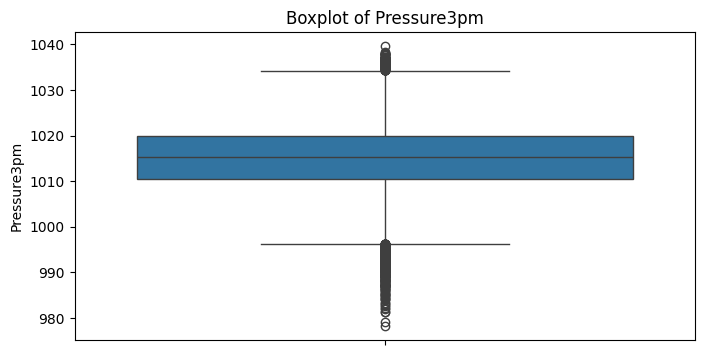

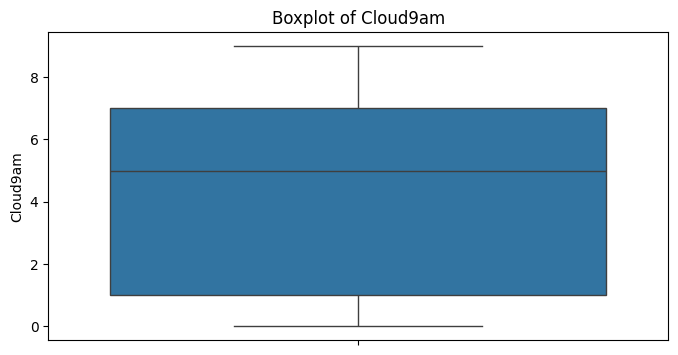

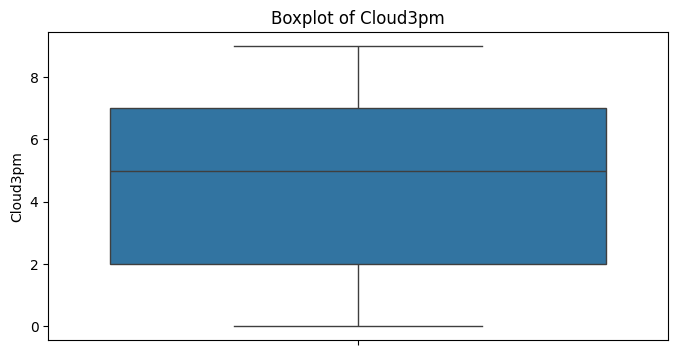

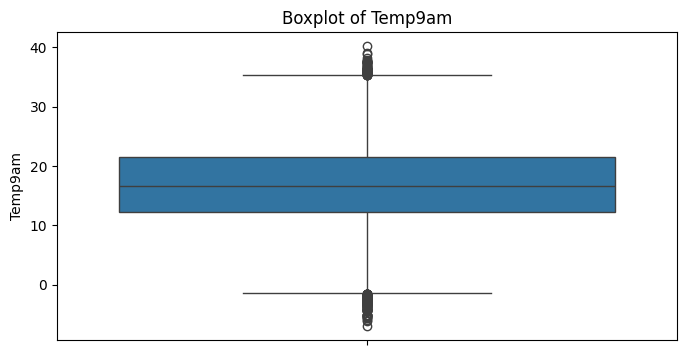

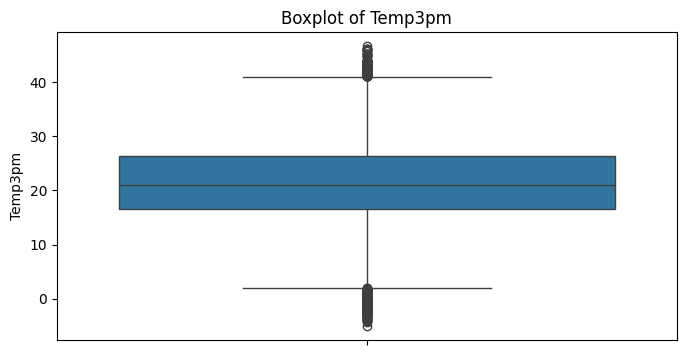

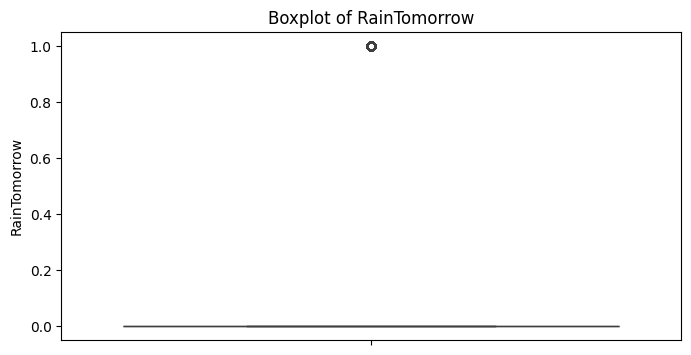

In [ ]:
# Get numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, y=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


**Handling missing values**

In [12]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(data)) * 100
print("Percentage of Missing Values:\n", missing_percentage)


Missing Values:
 row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64
Percentage of Missing Values:
 row ID            0.000000
Location          0.000000
MinTemp           0.445155
MaxTemp           0.231119
Rainfall          0.983761
Evaporation      42.737851
Sunshine         47.547128
WindGustDir       6.552715
WindGustSpeed     6.511516
WindDir9am        7.040074
WindDir3pm        2.660879
WindSpeed9am      0.939547
WindSpeed3pm      1.843925
Humidity9am       1.238997
Humidity3pm       2.518188
Press

In [13]:
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include='object').columns

# Fill missing values in numerical columns with median
for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].median())

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])


In [14]:
# Recheck for missing values
print("Missing Values After Handling:\n", data.isnull().sum())

Missing Values After Handling:
 row ID           0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


**Feature Engineering**

In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99516 non-null  float64
 3   MaxTemp        99516 non-null  float64
 4   Rainfall       99516 non-null  float64
 5   Evaporation    99516 non-null  float64
 6   Sunshine       99516 non-null  float64
 7   WindGustDir    99516 non-null  object 
 8   WindGustSpeed  99516 non-null  float64
 9   WindDir9am     99516 non-null  object 
 10  WindDir3pm     99516 non-null  object 
 11  WindSpeed9am   99516 non-null  float64
 12  WindSpeed3pm   99516 non-null  float64
 13  Humidity9am    99516 non-null  float64
 14  Humidity3pm    99516 non-null  float64
 15  Pressure9am    99516 non-null  float64
 16  Pressure3pm    99516 non-null  float64
 17  Cloud9am       99516 non-null  float64
 18  Cloud3

**Feature Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
numerical_cols = data.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


**Interaction Feature Creation**

In [17]:
# Example: Interaction between temperature and humidity
data['Temp_Humidity_Ratio'] = data['Temp3pm'] / (data['Humidity3pm'] + 1e-6)

# Interaction between wind speed and direction
data['WindSpeed_Diff'] = data['WindSpeed3pm'] - data['WindSpeed9am']


**Log Transformations**

In [18]:
import numpy as np

# Identify skewed features
skewed_features = ['Rainfall', 'Evaporation', 'Sunshine']  # Example skewed features
for col in skewed_features:
    data[col] = np.log1p(data[col])  # Apply log(1+x) to avoid log(0)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


**Rechecking data**

In [19]:
print(data.head())
print(data.info())


  row ID Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0   Row0   Albury  0.192033 -0.044616 -0.229085    -0.127358  0.138679   
1   Row1   Albury -0.748905  0.264943 -0.322622    -0.127358  0.138679   
2   Row2   Albury  0.835006  1.278047 -0.171260    -0.127358  0.138679   
3   Row3   Albury  0.380220  0.912204 -0.290461    -0.127358  0.138679   
4   Row4   Albury -0.701858  0.490077 -0.322622    -0.127358  0.138679   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure9am  Pressure3pm  \
0           W       0.311149          W  ...   -1.478788    -1.223547   
1         WNW       0.311149        NNW  ...   -1.049345    -1.118939   
2           W       0.082735        ENE  ...   -1.019728    -1.387930   
3         WNW       1.224806          W  ...   -1.256662    -1.477594   
4           W      -0.374093        SSE  ...   -0.634709    -0.775227   

   Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  \
0  1.458155  0.136037 -0.010570  0.018904     

**Correlation Analysis**

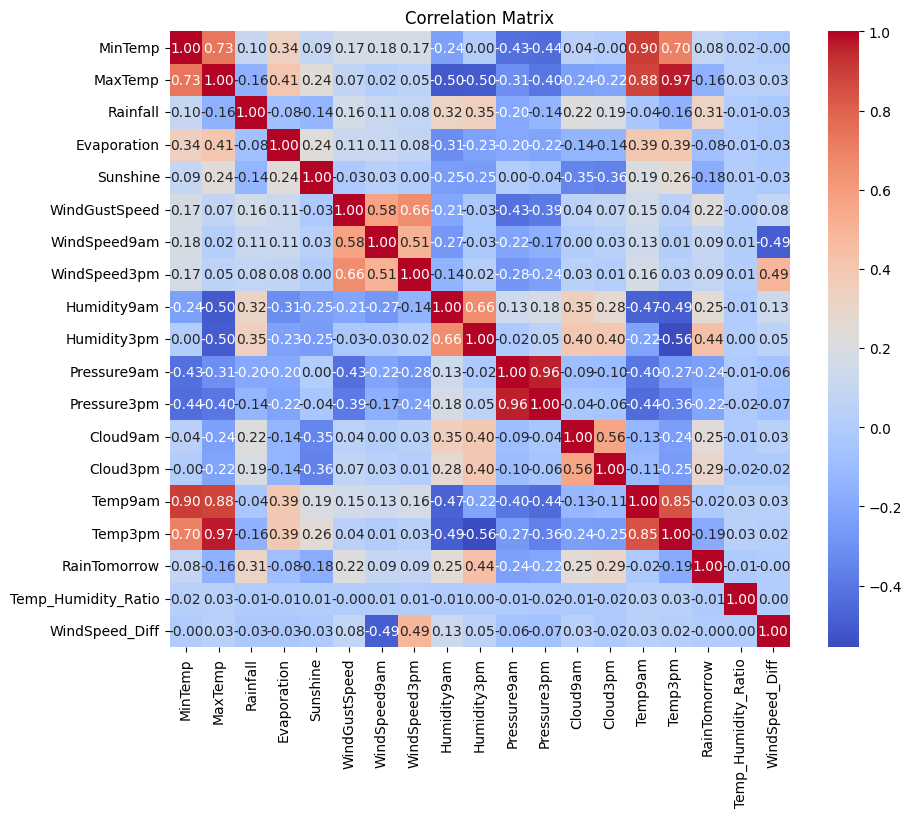

Highly correlated pairs (|correlation| > 0.85):
MinTemp - Temp9am: 0.90
MaxTemp - Temp9am: 0.88
MaxTemp - Temp3pm: 0.97
Pressure9am - Pressure3pm: 0.96
Pressure3pm - Pressure9am: 0.96
Temp9am - MinTemp: 0.90
Temp9am - MaxTemp: 0.88
Temp3pm - MaxTemp: 0.97


In [ ]:
# Filter numeric columns
numeric_data = data.select_dtypes(include=["number"])
# Compute correlation matrix
correlation_matrix = numeric_data.corr()
# Visualize the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
# Drop features with high correlation (> 0.85)
threshold = 0.85
high_corr_pairs = [
 (col1, col2)
 for col1 in correlation_matrix.columns
 for col2 in correlation_matrix.columns
 if abs(correlation_matrix[col1][col2]) > threshold and col1 != col2
]
# Output the highly correlated pairs
print("Highly correlated pairs (|correlation| > 0.85):")
for col1, col2 in high_corr_pairs:
 print(f"{col1} - {col2}: {correlation_matrix[col1][col2]:.2f}")

**Encoding categorical variables**

In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row ID               99516 non-null  object 
 1   Location             99516 non-null  object 
 2   MinTemp              99516 non-null  float64
 3   MaxTemp              99516 non-null  float64
 4   Rainfall             99516 non-null  float64
 5   Evaporation          89045 non-null  float64
 6   Sunshine             85292 non-null  float64
 7   WindGustDir          99516 non-null  object 
 8   WindGustSpeed        99516 non-null  float64
 9   WindDir9am           99516 non-null  object 
 10  WindDir3pm           99516 non-null  object 
 11  WindSpeed9am         99516 non-null  float64
 12  WindSpeed3pm         99516 non-null  float64
 13  Humidity9am          99516 non-null  float64
 14  Humidity3pm          99516 non-null  float64
 15  Pressure9am          99516 non-null 

In [21]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define the categorical columns based on your data structure
binary_cols = ['RainToday']  # Binary columns
multi_class_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']  # Multi-class columns

# Initialize encoders dictionary to store the encoders for later use
label_encoders = {}

# 1. Apply Label Encoding for binary categorical columns
for col in binary_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Encode binary column
    label_encoders[col] = le
    print(f"Label Encoding applied to binary column: {col}")

# 2. Apply One-Hot Encoding for multi-class categorical columns
data = pd.get_dummies(data, columns=multi_class_cols, drop_first=True)  # One-hot encode columns
print("One-Hot Encoding applied to multi-class columns:", multi_class_cols)

# Check the encoded data
print(data.head())


Label Encoding applied to binary column: RainToday
One-Hot Encoding applied to multi-class columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
  row ID   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0   Row0  0.192033 -0.044616 -0.229085    -0.127358  0.138679       0.311149   
1   Row1 -0.748905  0.264943 -0.322622    -0.127358  0.138679       0.311149   
2   Row2  0.835006  1.278047 -0.171260    -0.127358  0.138679       0.082735   
3   Row3  0.380220  0.912204 -0.290461    -0.127358  0.138679       1.224806   
4   Row4 -0.701858  0.490077 -0.322622    -0.127358  0.138679      -0.374093   

   WindSpeed9am  WindSpeed3pm  Humidity9am  ...  WindDir3pm_NNW  \
0      0.677651      0.612713     0.111811  ...           False   
1     -1.128037      0.383365    -1.312485  ...           False   
2     -0.789470      0.154017     0.692080  ...           False   
3      0.564796      0.612713    -0.732216  ...           False   
4     -0.902326     -0.19000

**Data Splitting**

In [22]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['RainTomorrow', 'row ID'])
y = data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Performing feature selection on the training set**

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np

# Step 1: Train a Random Forest model to get feature importance
feature_selector_model = RandomForestClassifier(random_state=42)
feature_selector_model.fit(X_train, y_train)

# Step 2: Get feature importance
feature_importances = pd.Series(feature_selector_model.feature_importances_, index=X_train.columns)
sorted_features = feature_importances.sort_values(ascending=False)

In [24]:
# Step 3: Select top N features
top_n = 10  # Adjust based on your preference
selected_features = sorted_features.head(top_n).index
print("Selected Features:", selected_features)

# Step 4: Reduce the training and test sets to the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Selected Features: Index(['Humidity3pm', 'Pressure3pm', 'Rainfall', 'Temp_Humidity_Ratio',
       'Pressure9am', 'WindGustSpeed', 'Humidity9am', 'Sunshine', 'Temp3pm',
       'MaxTemp'],
      dtype='object')


I tried using RFE as well, but my colab crrashed thrice even after intervals of 10-15 minutes. Thus, I used featureimportance from tree based models for feature selection.

**Training and Evaluation**

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer # Import SimpleImputer for imputation

# Assuming you have preprocessed your dataset and have X and y
# X = features (input data)
# y = target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute NaN values in scaled data using SimpleImputer
imputer = SimpleImputer(strategy='mean') # or strategy='median'
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled) # Use the same imputer for consistency

# Step 1: Train Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_scaled)



In [28]:
# Step 2: Train Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)  # No scaling needed for Decision Trees
y_pred_tree = decision_tree_model.predict(X_test)

# Step 3: Train Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)  # No scaling needed for Random Forest
y_pred_rf = random_forest_model.predict(X_test)

In [29]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("-" * 40)

# Evaluate Logistic Regression
evaluate_model("Logistic Regression", y_test, y_pred_logreg)

# Evaluate Decision Tree
evaluate_model("Decision Tree", y_test, y_pred_tree)

# Evaluate Random Forest
evaluate_model("Random Forest", y_test, y_pred_rf)


Model: Logistic Regression
Accuracy: 0.8456
Precision: 0.7277
Recall: 0.5108
F1 Score: 0.6002
Confusion Matrix:
 [[21786  1295]
 [ 3314  3460]]
----------------------------------------
Model: Decision Tree
Accuracy: 0.7879
Precision: 0.5319
Recall: 0.5443
F1 Score: 0.5380
Confusion Matrix:
 [[19836  3245]
 [ 3087  3687]]
----------------------------------------
Model: Random Forest
Accuracy: 0.8522
Precision: 0.7748
Recall: 0.4916
F1 Score: 0.6015
Confusion Matrix:
 [[22113   968]
 [ 3444  3330]]
----------------------------------------


**Plot of Feature importance**

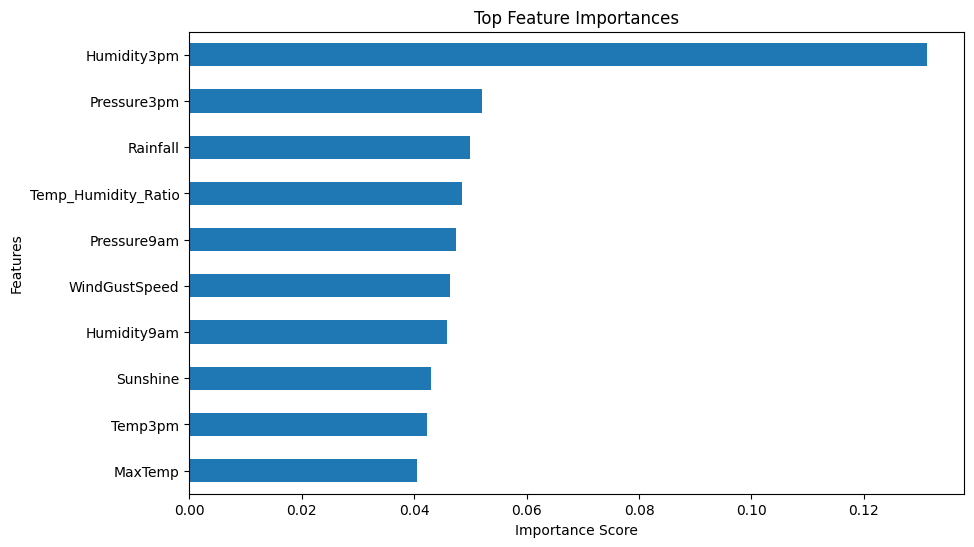

In [ ]:

# Optional: Plot the feature importance for better understanding
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sorted_features.head(top_n).plot(kind='barh')
plt.title("Top Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.show()

**Bonus Task**

I have already done this. But for the sake of instructor's ease, I have again made the plots.

Generating Pairplot...


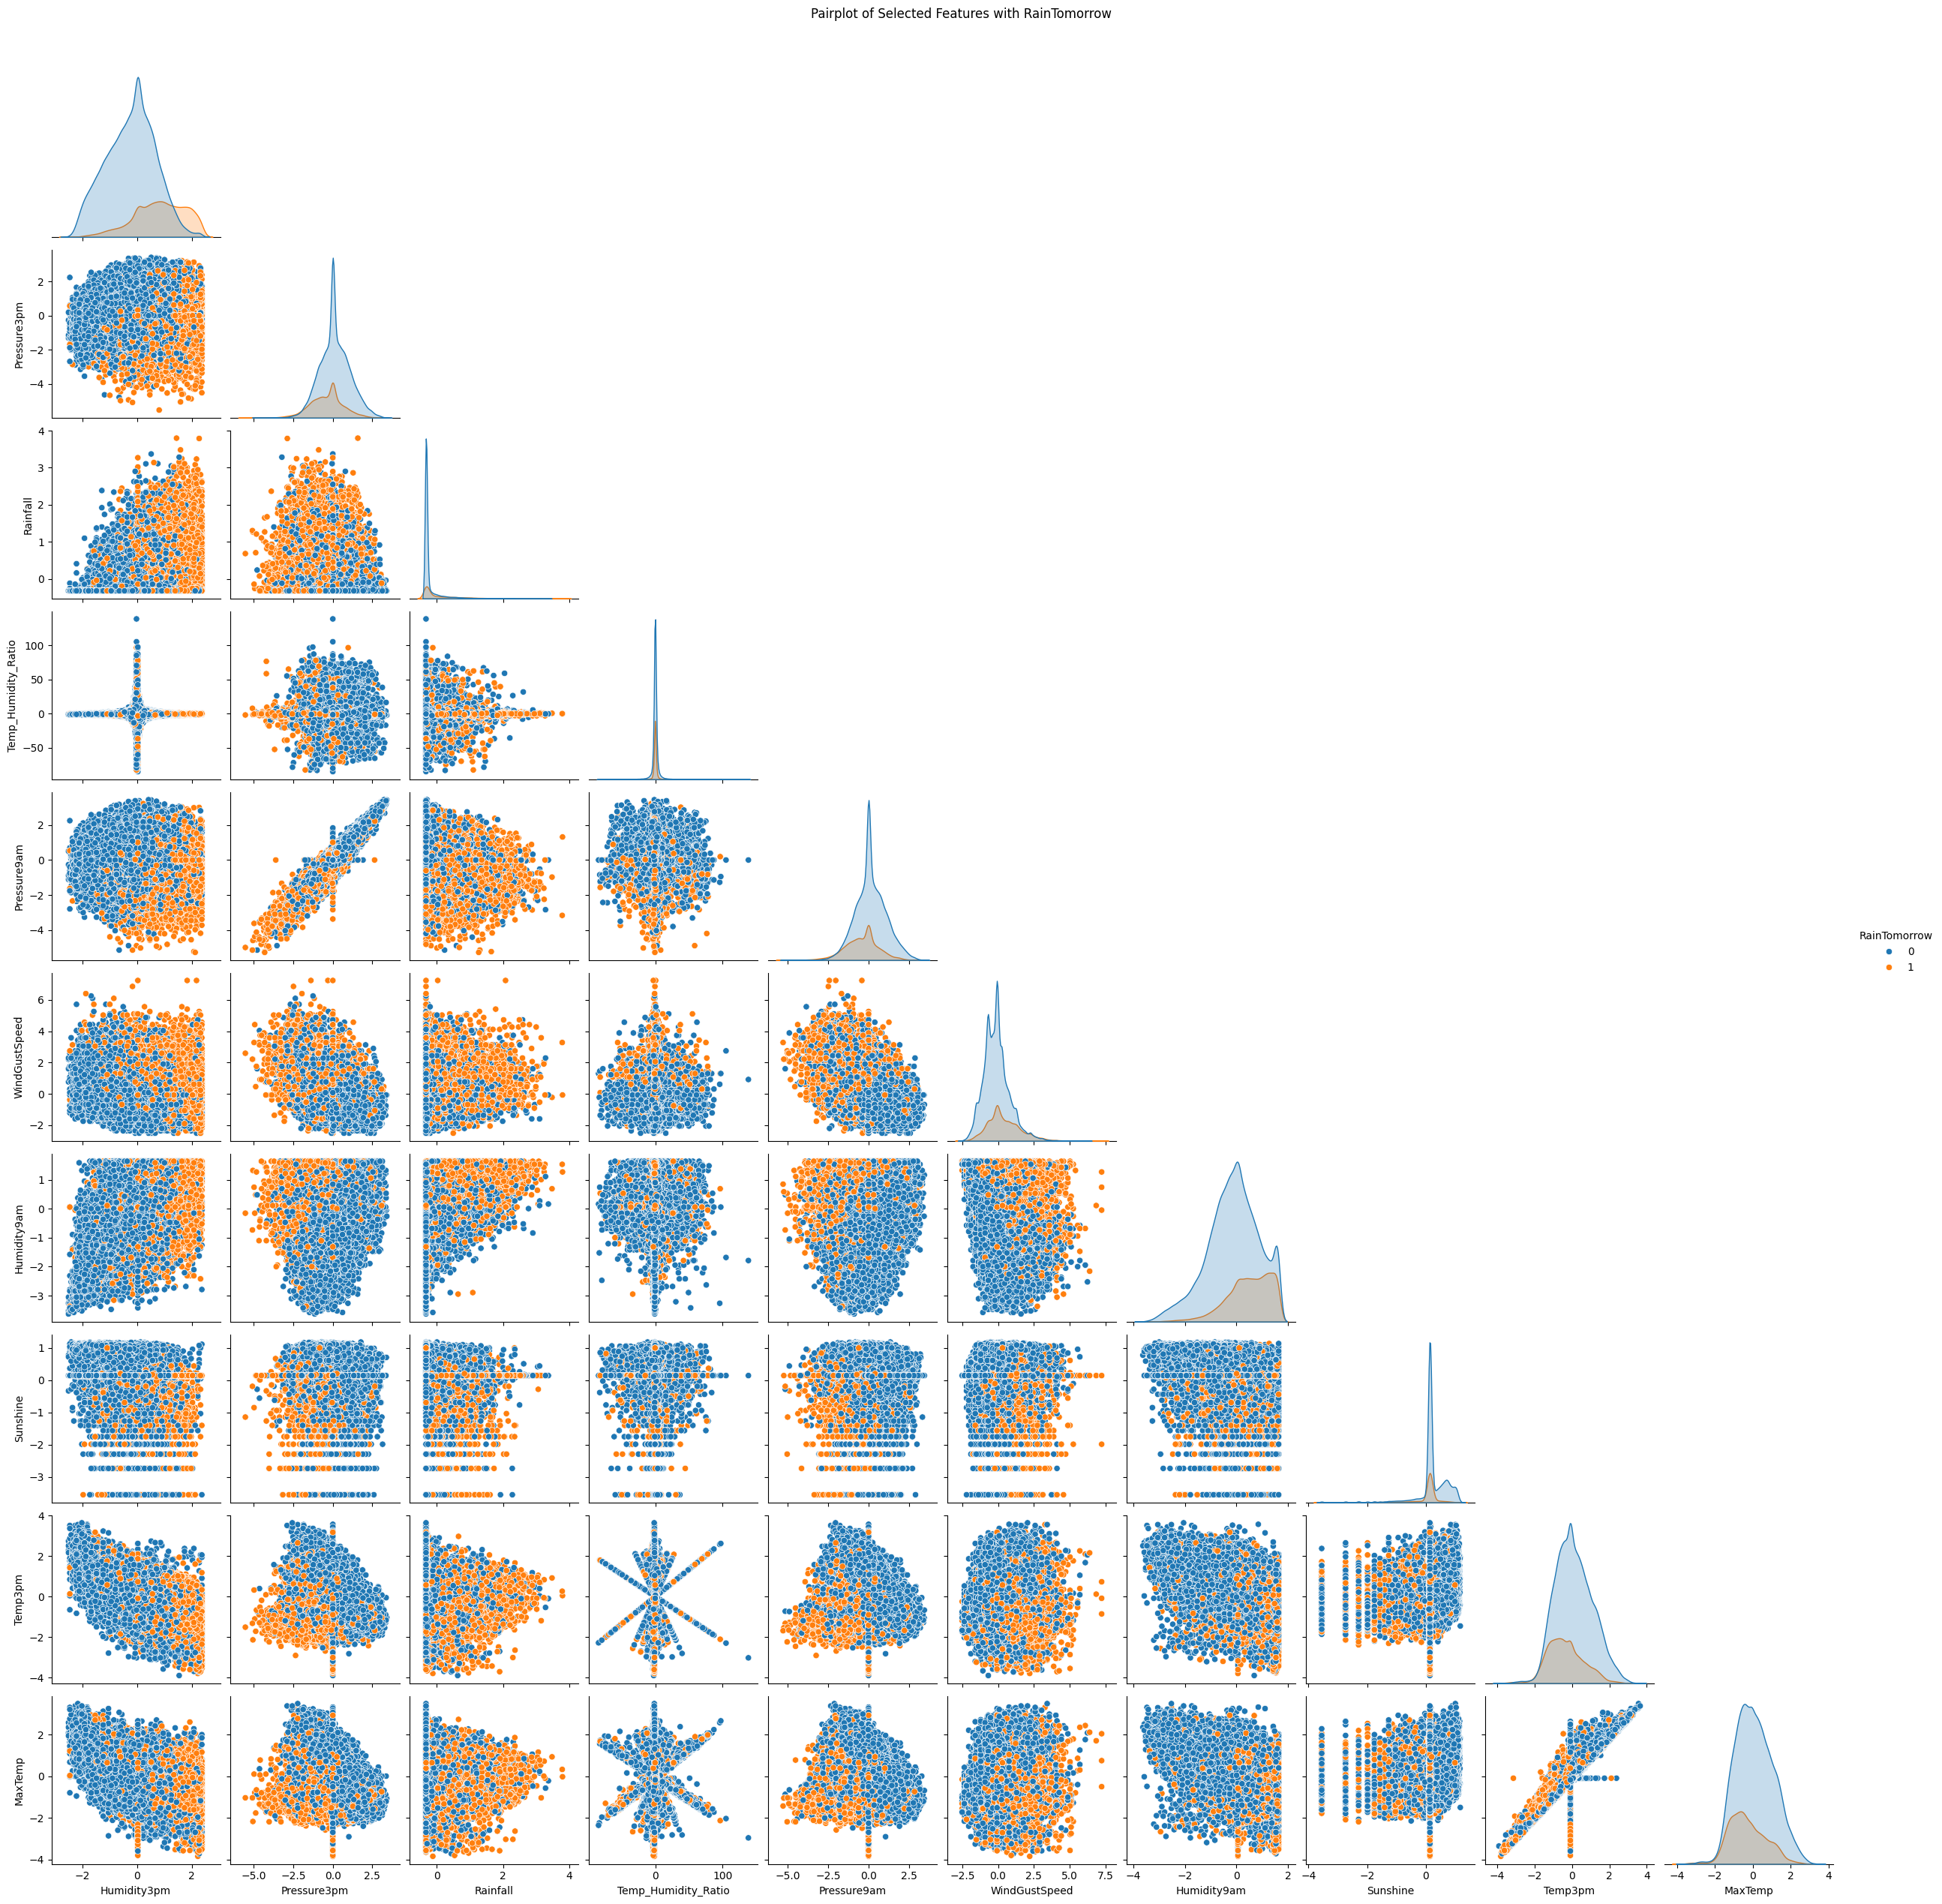

Generating Correlation Heatmap...


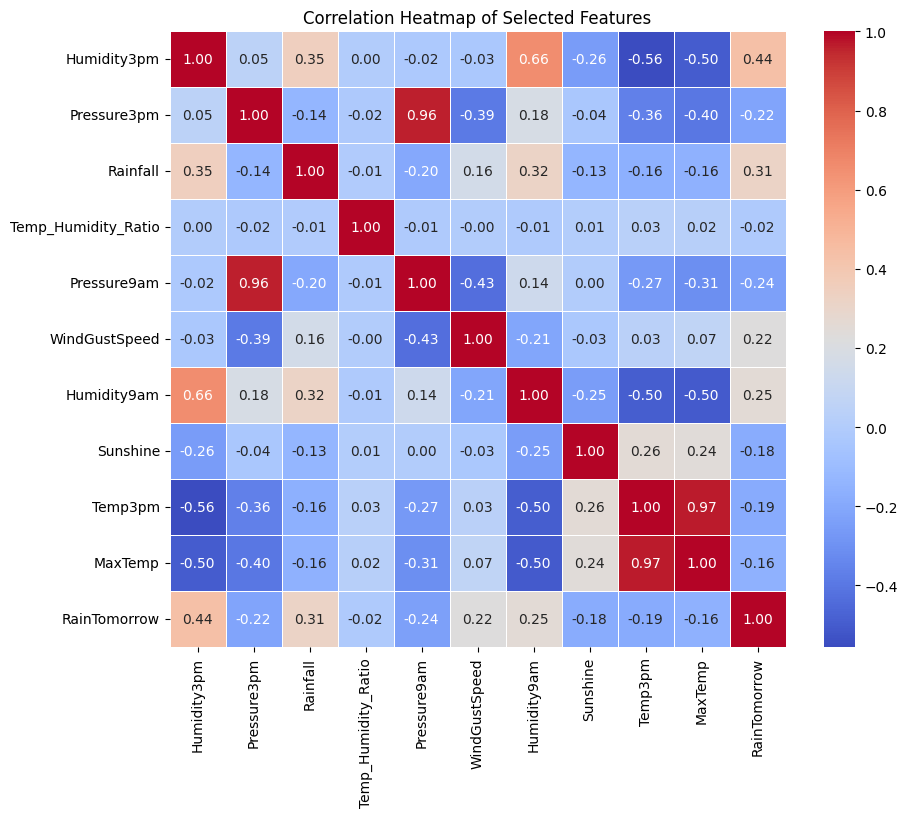

Generating Boxplots...


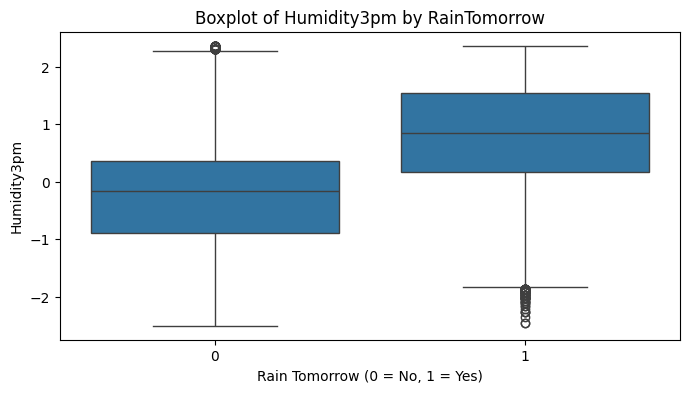

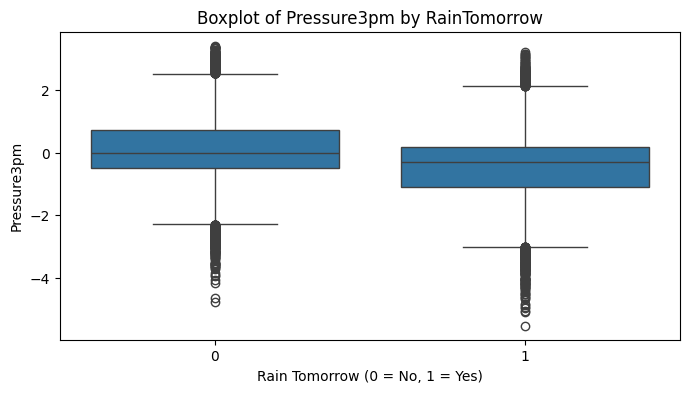

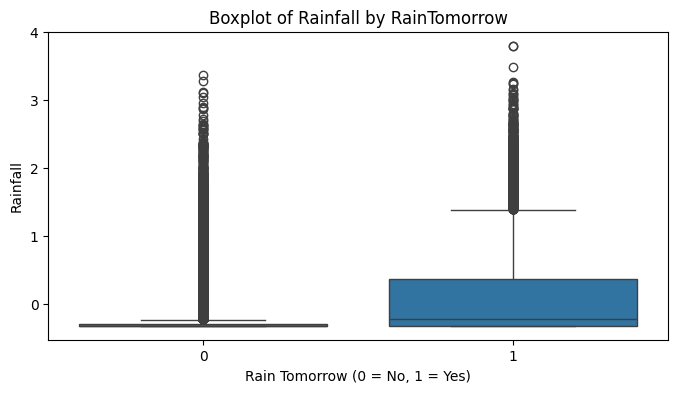

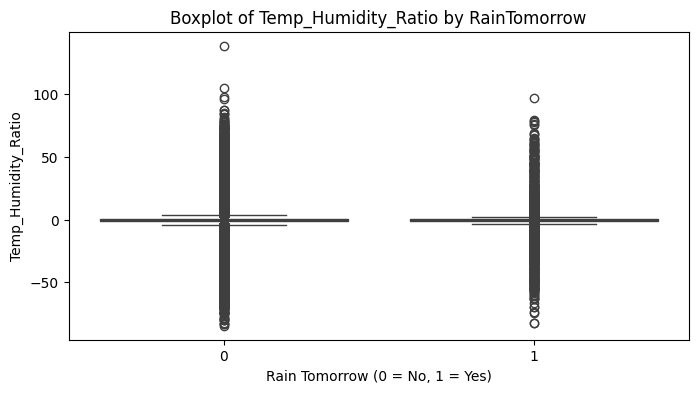

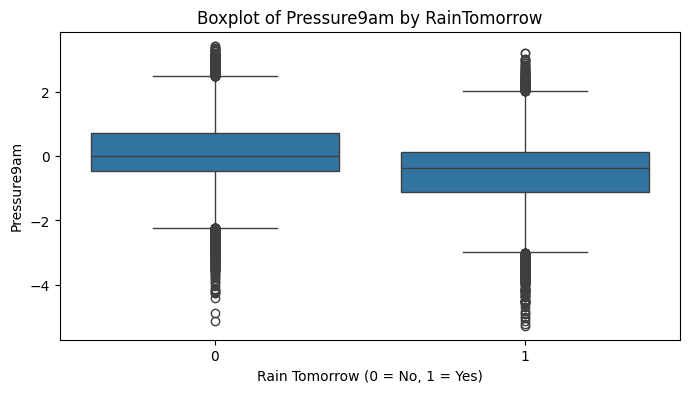

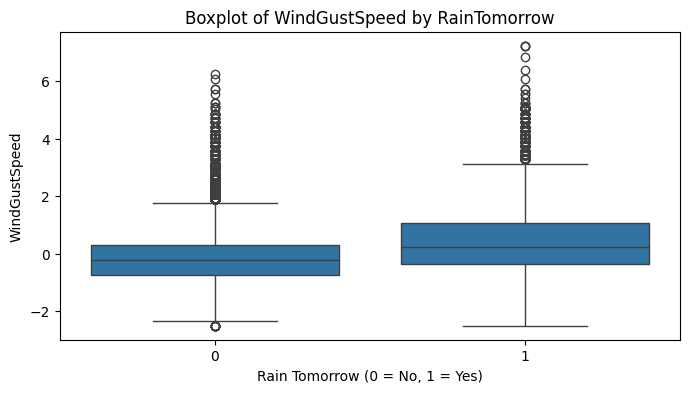

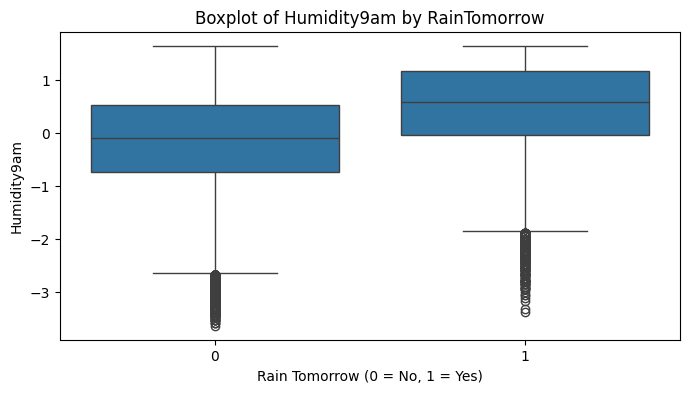

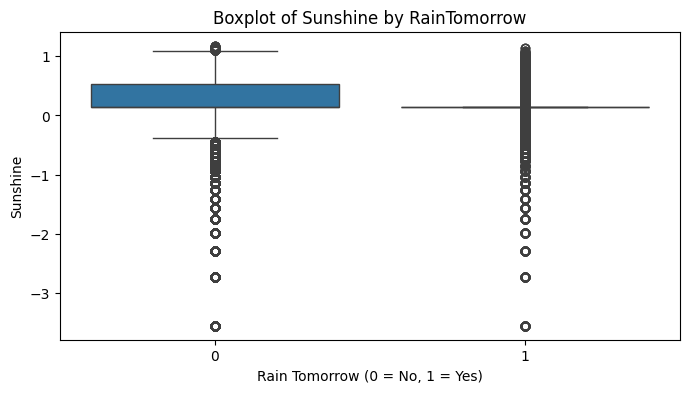

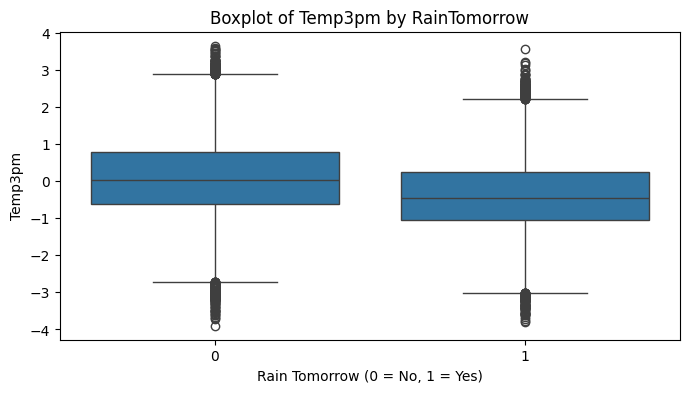

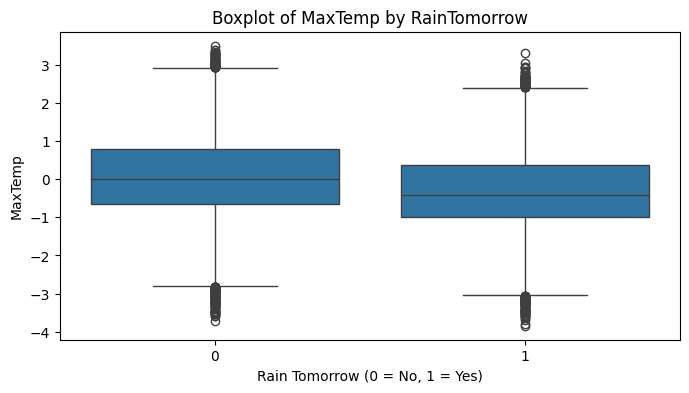

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add the target variable back to the selected training data for visualization
X_train_selected_with_target = X_train_selected.copy()
X_train_selected_with_target['RainTomorrow'] = y_train

# 1. **Pairplot to Explore Relationships**
print("Generating Pairplot...")
sns.pairplot(X_train_selected_with_target, hue='RainTomorrow', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Features with RainTomorrow", y=1.02)
plt.show()

# 2. **Correlation Heatmap**
print("Generating Correlation Heatmap...")
plt.figure(figsize=(10, 8))
correlation_matrix = X_train_selected_with_target.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# 3. **Boxplot for Numerical Features vs Target**
print("Generating Boxplots...")
numerical_features = X_train_selected.columns  # Assuming selected features are numerical
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='RainTomorrow', y=feature, data=X_train_selected_with_target)
    plt.title(f"Boxplot of {feature} by RainTomorrow")
    plt.xlabel("Rain Tomorrow (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.show()





### **Summary of Rain Prediction Task**

---

#### **Overview**
The goal was to predict whether it will rain the next day (`RainTomorrow`) using the Australia weather dataset. The task involved several key steps: **Exploratory Data Analysis (EDA)**, **Data Preprocessing**, **Feature Selection**, **Model Building**, and **Evaluation**.

---

#### **Steps and Highlights**

##### **1. Dataset Acquisition and Loading**
- The dataset was downloaded using `kagglehub`.
- Separate training and test datasets were provided.
- The test dataset lacked the target column (`RainTomorrow`) due to its competition setting. For evaluation purposes, the training data was split into training and validation subsets.

---

##### **2. Exploratory Data Analysis (EDA)**
- **Data Inspection**:
  - The dataset was analyzed for missing values, data types, and summary statistics.
  - Missing values were visualized using a heatmap for better understanding.
- **Boxplots**:
  - Outliers in numerical columns were identified through boxplots.
- **Correlation Analysis**:
  - A correlation matrix helped identify relationships between features and detect highly correlated pairs (|correlation| > 0.85).

---

##### **3. Data Preprocessing**
- **Handling Missing Values**:
  - Missing numerical values were filled with the median.
  - Missing categorical values were filled with the mode.
- **Feature Scaling**:
  - Numerical features were standardized using `StandardScaler`.
- **Feature Engineering**:
  - Created interaction features (e.g., `Temp_Humidity_Ratio` and `WindSpeed_Diff`).
  - Log transformations were applied to skewed features (e.g., `Rainfall`).
- **Encoding Categorical Variables**:
  - Binary columns were label-encoded, and multi-class columns were one-hot encoded.

---

##### **4. Feature Selection**
- **Feature Importance**:
  - Used feature importance from a Random Forest model to select the top 10 features.
  - RFE was initially attempted but was computationally expensive in Colab, leading to crashes.
- **Top Features**:
  - Features were ranked based on their importance scores, and the dataset was reduced to these selected features for modeling.

---

##### **5. Model Training and Evaluation**
- **Model**:
  - Different models were trained on the selected features.
- **Evaluation Metrics**:
  - Metrics like **Accuracy**, **Precision**, **Recall**, **F1-Score**, and **Confusion Matrix** were calculated to assess model performance.
  - Special focus was given to **Recall**, aiming to minimize false negatives (critical for rain prediction).
- **Results**:
  ```
  Model: Logistic Regression
  Accuracy: 0.8456
  Precision: 0.7277
  Recall: 0.5108
  F1 Score: 0.6002
  Confusion Matrix:
   [[21786  1295]
   [ 3314  3460]]
  ----------------------------------------
  Model: Decision Tree
  Accuracy: 0.7879
  Precision: 0.5319
  Recall: 0.5443
  F1 Score: 0.5380
  Confusion Matrix:
   [[19836  3245]
   [ 3087  3687]]
  ----------------------------------------
  Model: Random Forest
  Accuracy: 0.8522
  Precision: 0.7748
  Recall: 0.4916
  F1 Score: 0.6015
  Confusion Matrix:
   [[22113   968]
   [ 3444  3330]]
  ----------------------------------------
  ```

---

##### **6. Visualization**
- **Permutation Importance**:
  - Displayed feature importance using permutation importance for validation.
- **EDA-Based Visualizations**:
  - **Pairplots**: Showed relationships between selected features and `RainTomorrow`.
  - **Heatmap**: Visualized correlations among selected features and the target.
  - **Boxplots**: Highlighted differences in feature distributions between rain/no-rain days.

---

#### **Key Insights**
1. **Top Predictors**:
   - Features like humidity, wind speed, and temperature significantly influenced rain prediction.
2. **Feature Engineering**:
   - Interaction features and transformations improved the dataset’s predictive capability.
3. **Recall Emphasis**:
   - Ensuring high recall is crucial to minimize missed predictions of rain.

---

#### **Challenges and Resolutions**
- **RFE Crashes**:
  - Due to computational limits, feature selection was shifted to tree-based models.
  - I tried using RFE as well, but my Colab crashed thrice even after intervals of 10-15 minutes. Thus, I used feature importance from tree-based models for feature selection.
- **Missing Test Target**:
  - Resolved by splitting training data for validation during development.

---